In [1]:
import numpy as np 
import pandas as pd 

In [2]:
jobdescription = pd.read_excel('CompiledAnalyticsData_excel.xlsx',index=True)

jobdescription.head(3)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ID,Job Class,Job Title,Salary Estimate,Job Description,Rating,Company Name,...,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Clean Job Title,Clean Job Description,skills
0,0,0,0,0,Data Analyst,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,...,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,1,DATA ANALYST CENTER IMMIGRATION JUSTICE CIJ,taking party call record set impede real eager...,"['sql', 'aws', 'python', 'r', 'analysis']"
1,1,1,1,1,Data Analyst,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,...,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,QUALITY DATA ANALYST,train trend PLSQL topic dashborads computersci...,"['computerscience', 'master', 'analytics', 'he..."
2,2,2,2,2,Data Analyst,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,...,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,SENIOR DATA ANALYST INSIGHTS GAME TEAM CUSTOME...,dset dublin iconic dashborads master acting li...,"['master', 'sql', 'engineering', 'phd', 'table..."


In [3]:
jobdescription['Clean Job Description']= jobdescription['Job Description'].replace('[^A-Za-z0-9]+',' ',regex=True)

jobdescription.head(3)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ID,Job Class,Job Title,Salary Estimate,Job Description,Rating,Company Name,...,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Clean Job Title,Clean Job Description,skills
0,0,0,0,0,Data Analyst,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,...,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,1,DATA ANALYST CENTER IMMIGRATION JUSTICE CIJ,Are you eager to roll up your sleeves and harn...,"['sql', 'aws', 'python', 'r', 'analysis']"
1,1,1,1,1,Data Analyst,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,...,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,QUALITY DATA ANALYST,Overview Provides analytical and technical sup...,"['computerscience', 'master', 'analytics', 'he..."
2,2,2,2,2,Data Analyst,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,...,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,SENIOR DATA ANALYST INSIGHTS GAME TEAM CUSTOME...,We re looking for a Senior Data Analyst who ha...,"['master', 'sql', 'engineering', 'phd', 'table..."


In [4]:
!pip install nltk

In [5]:

import string
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords

In [6]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [7]:
newstopwords=stopwords.words("English") + ['play','will','within','one','use','make','way','across','need','care','help','high','must','area','state','people','member','may','well','using','etc','make','year','office',
                                           'us','change','part','access','time','able','issue','task','duties','day','field','meet','hand','first','ensure','best','sexual','gender','global','world','race','regard','client',
                                           'http','re','ad','self','highly','key','source','make','come','full','result','inc','build','end','color','years','work','role','family','date','team','equal','com',
                                           'u','law','www','com','please','life','also','level','new','non','system','service','sex','age','email','job','pay','duty','take','ha','a','b','d','e','f','g','strong',
                                          'status','offer','good','term','matter','open','get','person','ideal','place','title','go','inc','see','hour','tx','ca','skill','strong','month','pay',
                                          'degree','design','tool','build','client','drive','large','create','plan','user','lead','value','apply','review','learn','fast','assist','detail','manage','impact','type',
                                           'make','origin','make','policy','need','join','goal','expert','group','hire','need','method','action','focus','basis','cross','make','based','degree','skill','year','origin','austin',
                                           'need','pace','basic','right','wide','others','multi','pay','want','use','long','give','small','hire']
                                          

In [8]:
WNlemma = nltk.WordNetLemmatizer()


def pre_process(text): 
    tokens = nltk.word_tokenize(text)
    tokens=[t.lower() for t in tokens]
    tokens=[t for t in tokens if t not in string.punctuation]
    tokens=[ t for t in tokens if (not t.isnumeric() or len(t)<3)]
    tokens=[WNlemma.lemmatize(t) for t in tokens]
    tokens=[word for word in tokens if word not in newstopwords]
    text_after_process=' '.join(tokens)
    return(text_after_process)

#Apply the function on each document
jobdescription['Clean Job Description'] = jobdescription['Clean Job Description'].apply(pre_process)

In [9]:
jobdescription['Clean Job Description']=jobdescription['Clean Job Description'].replace(['pl sql','masters','git github','github','microsoft word','ms word','powerpoint','power point','data governance','statistics','mathematics','computer science','big data','modelling','microsoft office','ms office','java script','javascript','deep learning','tableau','datasets','data sets','dataset','data set','dashboards','dashboard','databases','data base',' sa ','regression','clustering','artificial intelligence',' ms ','mongodb','tensorflow','rapidminer','rainstor','elasticsearch','elastic search','airflow','kubernetes','tensor flow','air flow','power bi','scrum master','sisense','data studio','grafana','mapreduce','couchbase','blockchain','spotfire','chartio','metabase','cassandra','periscope data','dynamodb','firebase','big query',' teradata ','ad hoc','machine learning',' natural language processing ','decision tree','neural network','classification'],['PLSQL','master','GIT','GIT','msword','msword','PPT','PPT','DAG','stats','math','cse','bdata','model','mso','mso','jas','jas','deepl','tabl','dset','dset','dset','dset','dashb','dashb','db','db',' sas ','resn','cstg','ai','master','mgd','tefw','rpdm','rst','elsch','elsch','afw','kbnts','tefw','afw','bi','scr','sss','dtd','gfn','mrc','ccb','bcn','spfr','chto','mtbse','ssdr','prsc','dymd','fibs','bqry',' tdata ','adhoc','maclrg',' nlp ','dctre','nurnet','clas'],regex=True)

In [10]:
def tokenization(text):
    tokens=nltk.word_tokenize(text)
    tokens=[t for t in tokens if len(t)<7]
    tokens=set(tokens)
    tokens=' '.join(tokens)
    return(tokens)

jobdescription['Clean Job Description'] = jobdescription['Clean Job Description'].apply(tokenization)

In [11]:
jobdescription['Clean Job Description']=jobdescription['Clean Job Description'].replace(['DAG',' stats ',' math ',' cse ',' bdata ',' model ',' mso ',' jas ',' deepl ',' tabl ',' dset ',' dashb ',' db ',' teg ',' resn ',' cstg ',' mgd ',' tefw ',' rpdm ',' rst ',' elsch ',' afw ',' ai ',' kbnts ',' bi ',' scr ',' sss ',' dtd ',' gfn ',' mrc ',' ccb ',' bcn ',' spfr ',' chto ',' mtbse ',' ssdr ','data',' prsc ',' dymd ',' fibs ',' big ',' set ',' bqry ',' tdata ','adhoc','maclrg',' nlp ','dctre','nurnet',' clas '],['datagovernance',' statistics ',' mathematics ',' computerscience ',' bigdata ',' modelling ',' msoffice ',' javascript ',' deeplearning ',' tableau ',' dataset ',' dashborads ',' databases ',' text mining ',' regression ',' clustering ',' mongodb ',' tensorflow ',' rapidminer ',' rainstor ',' elasticsearch ',' airflow ',' artificialintelligence ',' kubernetes ',' powerbi ',' scrum',' sisense ',' datastudio ',' grafana ',' mapreduce ',' couchbase ',' blockchain ',' spotfire ',' chartio ',' metabase ',' cassandra ','',' periscopedata',' dynamodb ',' firebase ','','',' bigquery ',' teradata ','adhoc','machine learning','natural launguage processing','decision tree','neural network',' classification '],regex=True)

In [12]:
skill=['web','linux','java','c','r','python','sql','plsql','oracle','excel','sap','sas','cloud','plsql','postgresql','bigdata','hedis','hadoop','spark','teradata','pig','hive','deeplearning','kafta','hbase','splunk','presto','rapidminer','knime','hunk','beam','tensorflow','mongodb','aws','machinelaerning','mysql','etl','rainstor','airflow','kubernetes','docker','plotly','knime','splunk','elasticsearch','rainstor','ppt','msword',' r ','looker','powerbi','tableau','azure','nosql','git','javascript','artificialintelligence','scrum','spss','cassandra','orange','mapreduce','couchbase','ems','blockchain','orange','spotfire','chartio','cognos','metabase','sisense','qlik','redash','grafana','datastudio','orange','mode','periscopedata','pmp','api','dynamodb','oltp','olap','firebase','redis','sap','msoffice','bigquery','teradata','machine learning','decision tree','neural network','adhoc','dashboard','mining','deeplearning','nlp','modelling','regression','clustering','mathematics','statistics','businessintelligence','classification','modelling']

In [13]:
def skills(text):
    tokens=nltk.word_tokenize(text)
    tokens=[t for t in tokens if(t in skill)]
    tokens=' '.join(tokens)
    return(tokens)

jobdescription['Clean Job Description']=jobdescription['Clean Job Description'].apply(skills)

In [14]:

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)



from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline

In [15]:

# Create tfidf matrix
vectorizer = TfidfVectorizer(max_df=0.8, max_features=100,
                             min_df=100,
                             use_idf=True)

X = vectorizer.fit_transform(jobdescription['Clean Job Description'])
X.shape


(12381, 51)

In [16]:
## Apply KMeans for clustering

from sklearn.cluster import KMeans
from sklearn import metrics


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# #‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
distortions = []
K = range(1,55)
for k in K:
    kmeanModel = KMeans(n_clusters=k,max_iter=500).fit(X)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

In [ ]:
#plot the elbow
plt.figure(figsize=(10,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [17]:

km1 = KMeans(n_clusters=40, init='k-means++', max_iter=500)
km1.fit(X)


KMeans(max_iter=500, n_clusters=40)

In [18]:
#metric evaluation

print("Coefficient for 40 clusters: %0.3f"
      % metrics.silhouette_score(X, km1.labels_))

Coefficient for 40 clusters: 0.318


In [19]:
#Calinski-Harabasz Index

y=X.toarray()
metrics.calinski_harabasz_score(y, km1.labels_)

417.20411096676077

In [20]:
#Davies-Bouldin Index

from sklearn.metrics import davies_bouldin_score

y=X.toarray()
davies_bouldin_score(y, km1.labels_)

1.7744878776281865

In [21]:
#no of dos in each cluster

labels, counts = np.unique(km1.labels_[km1.labels_>=0], return_counts=True)
print (labels)
print (counts)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
[ 118  345 1918  658  153  183  220  281  321  218  206  327  170   51
  162  206  317  327  280  342  320  309  304  224  285  348  303  281
  359  225  210  235  261  317  280  234  164  359  423  137]


In [ ]:
#labelling the clusters

def print_terms(cm, num):
    original_space_centroids = cm.cluster_centers_
    order_centroids = original_space_centroids.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()
    for i in range(num):
        print("Cluster %d:" % i, end='')
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind], end='')
        print()

print_terms(km1, 40)


In [ ]:
# Let's assign the cluster label to the categories 
# Note: the order of clusters may change for differnt runs 

dict = { 0: 'Job Class 1', 1: 'Job Class 2' ,2: 'Job Class 3',3: 'Job Class 4',4: 'Job Class 5',5: 'Job Class 6',6: 'Job Class 7',7: 'Job Class 8',8: 'Job Class 9',9: 'Job Class 10',10: 'Job Class 11',11: 'Job Class 12',12: 'Job Class 13',13: 'Job Class 14',14: 'Job Class 15',15: 'Job Class 16',16: 'Job Class 17',17: 'Job Class 18',18: 'Job Class 19',19: 'Job Class 20',20: 'Job Class 21',21: 'Job Class 22',22: 'Job Class 23',23: 'Job Class 24',24: 'Job Class 25',25: 'Job Class 26',26: 'Job Class 27',27: 'Job Class 28',28: 'Job Class 29',29: 'Job Class 30',30: 'Job Class 31',31: 'Job Class 32',32: 'Job Class 33',33: 'Job Class 34',34: 'Job Class 35',35: 'Job Class 36',36: 'Job Class 37',37: 'Job Class 38',38: 'Job Class 39',39: 'Job Class 40'}
print(dict)
print(counts)
cluster_labels = [ dict[c] for c in km1.labels_]


In [ ]:
resumefile=open('resume.txt',mode='r')

In [ ]:
resume=resumefile.read()

In [ ]:
resume1=pd.Series(resume)

In [ ]:
Y = vectorizer.transform(resume1)

In [ ]:
predicted = km1.predict(Y)
print(predicted)

In [ ]:
cluster=predicted
cluster=cluster.item()
result=dict.get(cluster)
result

In [ ]:
jobdescription['predicted']=cluster_labels

In [ ]:

jobtitle=jobdescription['ID']
jobdesc=jobdescription['Job Title']
predict=jobdescription['predicted']

finalresume=zip(jobtitle,jobdesc,predict)

In [ ]:

for a,b,c in finalresume:
    if (c==result):
        print(a,b)


<ipython-input-1-56e523b626b7>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


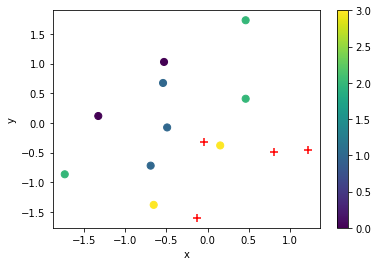

In [1]:

import numpy as np
import matplotlib.pyplot as plt

x = np.random.randn(10)
y = np.random.randn(10)
Cluster = np.array([0, 1, 1, 1, 3, 2, 2, 3, 0, 2])    # Labels of cluster 0 to 3
centers = np.random.randn(4, 2) 

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x,y,c=Cluster,s=50)
for i,j in centers:
    ax.scatter(i,j,s=50,c='red',marker='+')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)

fig.show()

In [13]:
from tkinter import *

window = Tk()

window.title("FIND YOUR JOB !!!")

window.geometry('500x500')

lbl = Label(window, text="JOB YOUR HAVE BEEN WAITING FOR")
lbl1 = Label(window, text="UPLOAD YOUR RESUME HERE :")

lbl.grid(column=2, row=5)
lbl1.grid(column=2, row=10)

txt = Entry(window,width=50)

txt.grid(column=2, row=11)

def clicked():

    #res = "Jobs matching your profile " + txt.get()

    #lbl.configure(text= res)
    txt1 = Entry(window,width=50)
    txt1.grid(column=2, row=15)
    
from tkinter import messagebox

messagebox.showinfo('Message title','Message content')

window.title("ERROR!!!")

window.geometry('350x200')


def clicked1():

    messagebox.showinfo('Message title', 'Message content')
    
    

if(txt.get()=='resume.doc'):
    btn = Button(window, text="UPLOAD", command=clicked)
    btn.grid(column=4, row=11)
else:
    btn = Button(window, text="UPLOAD", command=clicked1)
    btn.grid(column=4, row=11)

window.mainloop()



#btn = Button(window,text='Click here', command=clicked)

#btn.grid(column=0,row=0)

#window.mainloop()
